<a href="https://colab.research.google.com/github/yohanesnuwara/python-bootcamp-for-geoengineers/blob/master/EnP_training/session5_welltest_instructor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Well Test Modeling and Analysis with Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!git clone https://github.com/yohanesnuwara/pyreservoir

Cloning into 'pyreservoir'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 780 (delta 63), reused 0 (delta 0), pack-reused 658
Receiving objects: 100% (780/780), 24.02 MiB | 14.00 MiB/s, done.
Resolving deltas: 100% (417/417), done.


In [3]:
import sys
sys.path.append('/content/pyreservoir/welltest')

In [8]:
# import functions for well test modeling and analysis
from wellflo import * # import all functions
from wellanalysis import constant_rate_drawdown_test, constant_rate_buildup_test

## Modeling a Multirate Test

We want to model how the pressure transient response of a well is if we conduct a series of rate-changing test (or we call as: multirate test). The following is the series of rate we want to model.

|Hours|Rate (STB/D)|
|:--:|:--:|
|$$0 < t \leq 10$$|1,000|
|$$10 < t \leq 20$$|2,000|
|$$20 < t \leq 30$$|3,000|
|$$30 < t \leq 45$$|1,500|
|$$45 < t \leq 65$$|0|
|$$65 < t \leq 70$$|1,000|

Reservoir rock and fluid properties:
* Reservoir initial pressure 2,500 psia
* Porosity 15%
* Total compressibility 12 microsip
* Permeability 600 md
* Radius of wellbore 4 inch (1 inch = 0.0833 ft)
* Reservoir thickness 32 ft
* Oil viscosity 2 cp
* Distance from wellbore to reservoir outer boundary 3,000 ft 
* Oil FVF 1.33 RB/STB

First we want to plot the rates.

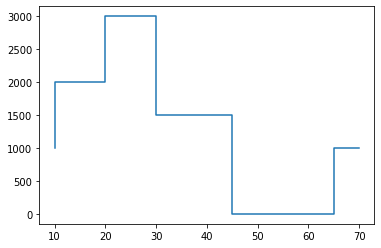

In [35]:
# plot the rate: use plt.step
t_change = np.array([10, 20, 30, 45, 65, 70])
q_change = np.array([1000, 2000, 3000, 1500, 0, 1000])

plt.step(t_change, q_change)
plt.show()

In [16]:
# Inputs
poro = 0.15 # Porosity
ct = 12E-6 # Total compressibility, sip
perm = 600 # Permeability, md
rw = 4 * .08333 # Radius of wellbore, convert inch to ft
h = 32 # Reservoir thickness, ft
mu = 2 # Oil viscosity, cp
re = 3000 # Distance from centre of wellbore to outer reservoir boundary, ft
Bo = 1.333 # Oil FVF, RB/STB

p_initial = 2500 # Initial pressure, psia

Before we do modeling, we need to know how much time until the flow behaves finite-acting (or we call as finite-acting time)

In [10]:
# we use "time_finite_acting" function. See help first
help(time_finite_acting)

Help on function time_finite_acting in module wellflo:

time_finite_acting(perm, poro, mu, ct, rw, re)
    Calculate time at flow starts behaving infinite-acting



In [13]:
# calculate finite-acting time
t_finite = time_finite_acting(perm, poro, mu, ct, rw, re)
t_finite = np.round(t_finite, 3) # round to 3 decimal places

print('Finite-acting time is {} hours'.format(t_finite))

Finite-acting time is 51.195 hours


Finally, we do modeling. 


In [14]:
# we use "simulate_multirate_test" function. See help first
help(simulate_multirate_test)

Help on function simulate_multirate_test in module wellflo:

simulate_multirate_test(p_initial, t_step, t_change, q_change, re, rw, perm, poro, mu, ct, Bo, h)
    Simulate the Multiple Constant Rate Test Started from 0th Hour 
    Based on Superposition Principle



We need to specify the time steps. Smaller timestep will result a better result, but requires more time to compute. Here we'll use timestep of 0.1 hour, that is enough.

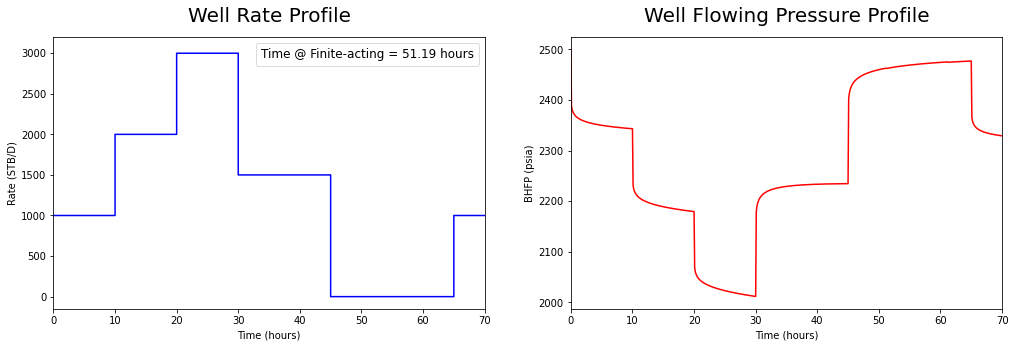

In [17]:
# specify time step
t_step = 0.1

simulate_multirate_test(p_initial, t_step, t_change, q_change, 
                        re, rw, perm, poro, mu, ct, Bo, h)

Now, change the porosity, permeability, compressibility, viscosity, reservoir size, and oil FVF. See their effects on the finite-acting time and the pressure transient profile. Make the following cell your playground! 

Finite-acting time is 273.038 hours


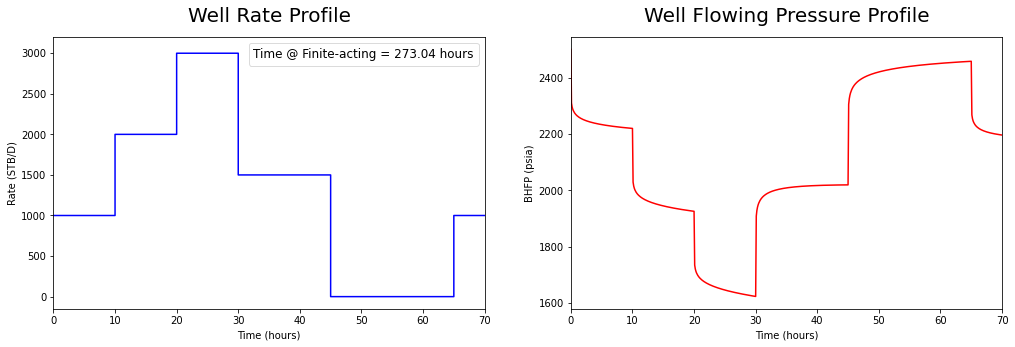

In [24]:
# Inputs
poro = 0.4 # Porosity
ct = 12E-6 # Total compressibility, sip
perm = 300 # Permeability, md
rw = 4 * .08333 # Radius of wellbore, convert inch to ft
h = 32 # Reservoir thickness, ft
mu = 2 # Oil viscosity, cp
re = 3000 # Distance from centre of wellbore to outer reservoir boundary, ft
Bo = 1.33 # Oil FVF, RB/STB

p_initial = 2500 # Initial pressure, psia

# calculate finite-acting time
t_finite = time_finite_acting(perm, poro, mu, ct, rw, re)
t_finite = np.round(t_finite, 3) # round to 3 decimal places

print('Finite-acting time is {} hours'.format(t_finite))

# specify time step
t_step = 0.1

simulate_multirate_test(p_initial, t_step, t_change, q_change, 
                        re, rw, perm, poro, mu, ct, Bo, h)

## Modeling a Multiple Pressure Test

We want to model how the rate transient response of a well is if we conduct a series of pressure-changing test (or we call as: multiple pressure test). The following is the series of rate we want to model.

|Hours|BHFP (psia)|
|:--:|:--:|
|$$0 < t \leq 20$$|1,500|
|$$10 < t \leq 40$$|1,200|
|$$20 < t \leq 60$$|1,000|
|$$30 < t \leq 80$$|1,400|
|$$45 < t \leq 100$$|1,600|
|$$65 < t \leq 120$$|1,000|

We use the same property as before. Reservoir rock and fluid properties:
* Reservoir initial pressure 2,500 psia
* Porosity 15%
* Total compressibility 12 microsip
* Permeability 600 md
* Radius of wellbore 4 inch (1 inch = 0.0833 ft)
* Reservoir thickness 32 ft
* Oil viscosity 2 cp
* Distance from wellbore to reservoir outer boundary 3,000 ft 
* Oil FVF 1.33 RB/STB

First we want to plot the BHFP (borehole flowing pressure)

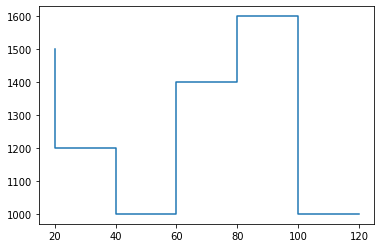

In [36]:
# plot the pressure: use plt.step
t_change = np.array([20, 40, 60, 80, 100, 120])
p_change = np.array([1500, 1200, 1000, 1400, 1600, 1000])

plt.step(t_change, p_change)
plt.show()

In [37]:
# Inputs
poro = 0.15 # Porosity
ct = 12E-6 # Total compressibility, sip
perm = 600 # Permeability, md
rw = 4 * .08333 # Radius of wellbore, convert inch to ft
h = 32 # Reservoir thickness, ft
mu = 2 # Oil viscosity, cp
re = 3000 # Distance from centre of wellbore to outer reservoir boundary, ft
Bo = 1.333 # Oil FVF, RB/STB

p_initial = 2500 # Initial pressure, psia

Calculate finite-acting time.

In [38]:
# calculate finite-acting time
t_finite = time_finite_acting(perm, poro, mu, ct, rw, re)
t_finite = np.round(t_finite, 3) # round to 3 decimal places

print('Finite-acting time is {} hours'.format(t_finite))

Finite-acting time is 51.195 hours


Specify the timestep and do modeling.


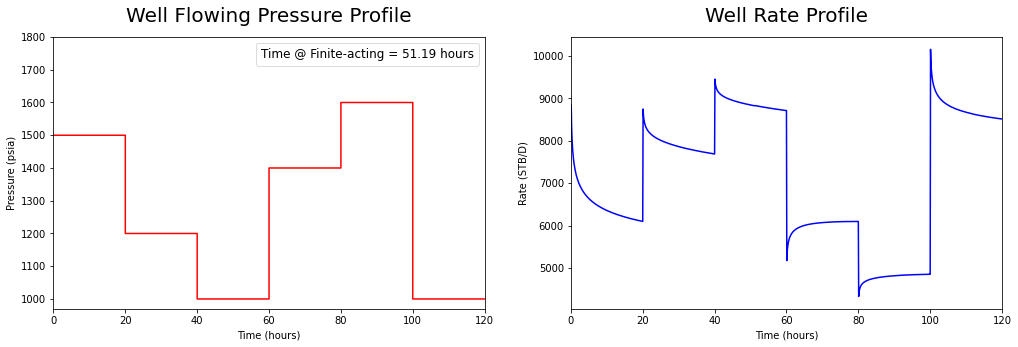

In [39]:
# specify time step
t_step = 0.1

simulate_multipressure_test(p_initial, t_step, t_change, p_change, 
                            re, rw, perm, poro, mu, ct, Bo, h)

Now, change the porosity, permeability, compressibility, viscosity, reservoir size, and oil FVF. See their effects on the finite-acting time and the rate transient profile. Make the following cell your playground! 

Finite-acting time is 273.038 hours


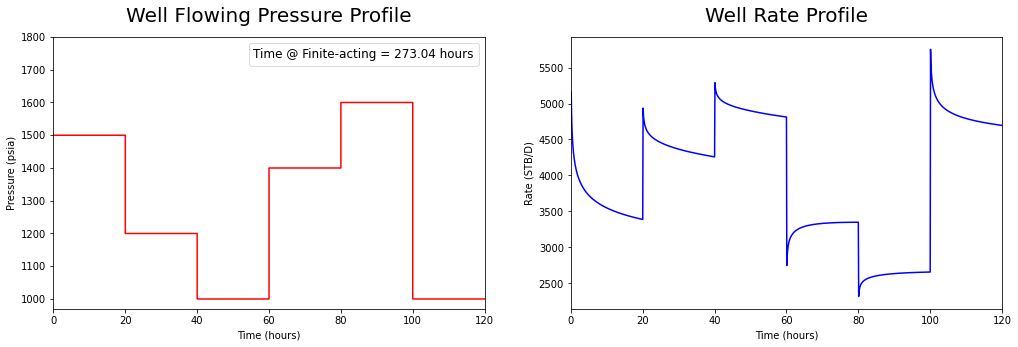

In [40]:
# Inputs
poro = 0.4 # Porosity
ct = 12E-6 # Total compressibility, sip
perm = 300 # Permeability, md
rw = 4 * .08333 # Radius of wellbore, convert inch to ft
h = 32 # Reservoir thickness, ft
mu = 2 # Oil viscosity, cp
re = 3000 # Distance from centre of wellbore to outer reservoir boundary, ft
Bo = 1.33 # Oil FVF, RB/STB

p_initial = 2500 # Initial pressure, psia

# calculate finite-acting time
t_finite = time_finite_acting(perm, poro, mu, ct, rw, re)
t_finite = np.round(t_finite, 3) # round to 3 decimal places

print('Finite-acting time is {} hours'.format(t_finite))

# specify time step
t_step = 0.1

simulate_multipressure_test(p_initial, t_step, t_change, p_change, 
                            re, rw, perm, poro, mu, ct, Bo, h)